In [45]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import os
from StringIO import StringIO
from PIL import Image
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [93]:
def load_dataset():
    def load_images(filename):
        if (os.path.exists(filename)):
            # print filename
            np_imgs = []
            zf = ZipFile(filename, 'r')
            # print len(zf.namelist())
            # sizes = []
            # TODO: put len(zf.namelist())
            for i in range(1, 15):
                data = StringIO(zf.read(zf.namelist()[i]))
                img = Image.open(data)
                np_imgs.append(np.array(img))
            return np_imgs

    def load_labels(filename):
        if (os.path.exists(filename)):
            # print filename
            return pd.read_csv(ZipFile(filename, 'r').open('labels.csv'))

    X_train = load_images('data/train.zip')
    Y_train = load_labels('data/labels.csv.zip')
    # X_test = []
    X_test = load_images('data/test.zip')
    return X_train, Y_train, X_test

In [94]:
X_train_orig, Y_train_orig, X_test_orig = load_dataset()
# print X_train
# print Y_train

(500, 375, 3)


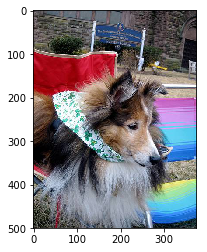

In [97]:
print X_train_orig[10].shape
plt.imshow(X_train_orig[10])

(500, 388, 3)


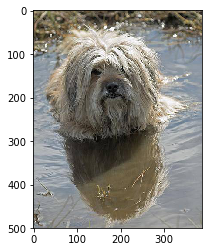

In [98]:
print X_test_orig[10].shape
plt.imshow(X_test_orig[10])

In [ ]:
#######################################################################################

In [109]:
Y_sample = pd.read_csv(ZipFile('data/sample_submission.csv.zip', 'r').open('sample_submission.csv'))
print Y_sample.head()

                                 id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1  00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2  0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3  001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4  001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.008333  0.008333                        0.008333     0.008333   
1             0.008333  0.008333                        0.008333     0.008333   
2             0.008333  0.008333                        0.008333     0.008333   
3             0.008333  0.008333                        0.008333     0.008333   
4             0.008333  0.008333                        0.008333     0.008333   

   australian_terrier   basenji    basset        ...          toy_poodle  \
0            0.008333  0.008